# Assignment 3
Hanifi Aslankarayiğit 2200356031
Mustafa Emre Yıldırım 2200356068

# Part1

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
import os
from matplotlib import pyplot as plt
import numpy as np
import cv2 
import pandas as pd
import seaborn as sns

flower_names= ['aster', 'calendula', 'california_poppy','coreopsis','daisy','dandelion','iris','lavender','lily','marigold','orchid','poppy','rose','sunflower','tulip']
    
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(flower_names)

class_dict = {flower_names[i]: int(encoded_classes[i]) for i in range(len(flower_names))}
print(class_dict)

{'aster': 0, 'calendula': 1, 'california_poppy': 2, 'coreopsis': 3, 'daisy': 4, 'dandelion': 5, 'iris': 6, 'lavender': 7, 'lily': 8, 'marigold': 9, 'orchid': 10, 'poppy': 11, 'rose': 12, 'sunflower': 13, 'tulip': 14}


Normalize_images normalizes a set of images by dividing the pixel values by 255.0 to scale them between 0 and 1.

Next, it uses a LabelEncoder to transform the flower class names into numerical labels (encoded_classes). These labels are stored in a dictionary that maps each flower name to its corresponding encoded label.You can see above.

While preparing datasets OpenCV (cv2) loads each image, resizes them to a fixed dimension (28x28 pixels), converts them to grayscale, and normalizes the pixel values using a predefined function.

In [126]:
def normalize_images(images):
    return images / 255.0



class_dict = {flower_names[i]: encoded_classes[i] for i in range(len(flower_names))}

flowers_dir = 'C:\\Users\\orgnh\\Downloads\\aaa\\flowers15'

train_dir = os.path.join(flowers_dir, 'train')
test_dir = os.path.join(flowers_dir, 'test')
validation_dir = os.path.join(flowers_dir, 'val')

data = []
for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)
    train_images = os.listdir(class_train_dir)
    for image_name in train_images:
       
        img_path = os.path.join(class_train_dir, image_name)
      
        img = cv2.imread(img_path)
      
        img = cv2.resize(img,(28,28))
    
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        
        img_normalized = normalize_images(img_gray)
        
        class_label = class_dict[class_name]
       
        data.append({
            'Class': class_label,
            'value': img_normalized.flatten(),
            
        })
train_df = pd.DataFrame(data)


data = []
for class_name in os.listdir(validation_dir):
    class_validation_dir = os.path.join(validation_dir, class_name)
    validation_images = os.listdir(class_validation_dir)
    for image_name in validation_images:
       
        img_path = os.path.join(class_validation_dir, image_name)
      
        img = cv2.imread(img_path)
        #b
        
        img = cv2.resize(img,(28,28))

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        img_normalized = normalize_images(img_gray)

        class_label = class_dict[class_name]

        data.append({
            'Class': class_label,
            'value': img_normalized.flatten(),

        })
        
validation_df = pd.DataFrame(data)

data = []
i = 0
for class_name in os.listdir(test_dir):
    class_test_dir = os.path.join(test_dir, class_name)
    test_images = os.listdir(class_test_dir)
    for image_name in test_images:
       
        img_path = os.path.join(class_test_dir, image_name)
      
        img = cv2.imread(img_path)
        #a
        
        img = cv2.resize(img,(28,28))

        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        img_normalized = normalize_images(img_gray)

        class_label = class_dict[class_name]

        data.append({
            'Class': class_label,
            'value': img_normalized.flatten(),

        })
        
test_df = pd.DataFrame(data)

In [128]:
X_train = np.array(train_df['value'].tolist()).T
y_train = np.array(train_df['Class'])


X_test = np.array(test_df['value'].tolist()).T
y_test = np.array(test_df['Class'])

X_valid = np.array(validation_df['value'].tolist()).T
y_valid = np.array(validation_df['Class'])

In [69]:
def init_params(layer_dims):
    parameters = {}
    
    L = len(layer_dims)
    
    for l in range(1, L):
        temp1 = layer_dims[l]
        temp2 = layer_dims[l-1]
        parameters['W' + str(l)] = np.random.rand(temp1, temp2) - 0.5
        parameters['b' + str(l)] = np.random.rand(temp1, 1) - 0.5
        
    return parameters

def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    
    exp = np.exp(Z - np.max(Z, axis=0))
    return exp / exp.sum(axis=0)

def one_hot(Y):
    
    one_hot_Y = np.zeros((Y.max()+1,Y.size)) 
    one_hot_Y[Y,np.arange(Y.size)] = 1 
    return one_hot_Y

def get_predictions(parameters2):
    L = len(parameters2) // 2
    temp = parameters2['A'+str(L)]
    return np.argmax(temp, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def forward_propagation(X, parameters):
    parameters2 = {}
    L = len(parameters) // 2
    
    parameters2['Z1'] = parameters['W1'].dot(X) + parameters['b1']
    parameters2['A1'] = ReLU(parameters2['Z1'])
    
    for l in range(2, L):
        parameters2['Z' + str(l)] = parameters['W' + str(l)].dot(parameters2['A' + str(l-1)]) + parameters['b' + str(l)]
        parameters2['A' + str(l)] = ReLU(parameters2['Z' + str(l)])
       
    
    
    parameters2['Z' + str(L)] = parameters['W' + str(L)].dot(parameters2['A' + str(L-1)]) + parameters['b' + str(L)]
    parameters2['A' + str(L)] = softmax(parameters2['Z' + str(L)])
    return parameters2

def backward_propagation(X,Y, parameters,parameters2,m):
    parameters3 = {}
    one_hot_Y = one_hot(Y)
    L = len(parameters) // 2
    parameters3['dZ' + str(L)] = parameters2['A' + str(L)] - one_hot_Y
    parameters3['dW' + str(L)] = 1 / m * (parameters3['dZ' + str(L)].dot(parameters2['A' + str(L-1)].T))
    parameters3['db' + str(L)] = 1 / m * np.sum(parameters3['dZ' + str(L)],1)
    
    for i in reversed(range(2,L)):
        parameters3['dZ' + str(i)] = parameters['W' + str(i+1)].T.dot(parameters3['dZ' + str(i+1)]) * derivative_ReLU(parameters2['Z' + str(i)])
        parameters3['dW' + str(i)] = 1 / m * (parameters3['dZ' + str(i)].dot(parameters2['A' + str(i-1)].T))
        parameters3['db' + str(i)] = 1 / m * np.sum(parameters3['dZ' + str(i)],1)
    
    parameters3['dZ1'] = parameters['W2'].T.dot(parameters3['dZ2']) * derivative_ReLU(parameters2['Z1'])
    parameters3['dW1'] = 1 / m * parameters3['dZ1'].dot(X.T) 
    parameters3['db1'] = 1 / m * np.sum(parameters3['dZ1'],1)
    
    return parameters3

def update_params(alpha,parameters, parameters3):
    L = len(parameters) // 2
    for i in range(1,L+1):
        parameters['W' + str(i)] -= alpha * parameters3['dW' + str(i)]
        parameters['b' + str(i)] -= alpha * np.reshape(parameters3['db' + str(i)],(parameters['W' + str(i)].shape[0],1))
        
    return parameters

def gradient_descent(X, Y,layer_dims, alpha, iterations):
    
    size, m = X.shape
    parameters = init_params(layer_dims)
    losses = []
    for i in range(iterations):
        parameters2 = forward_propagation(X, parameters)
        current_loss = compute_loss(one_hot(Y), parameters2['A' + str(len(layer_dims) - 1)])
        losses.append(current_loss)
        parameters3 = backward_propagation(X,Y, parameters,parameters2,m)
        parameters = update_params(alpha,parameters, parameters3)
        if (i + 1) % int(iterations / 10) == 0:
            print(f"Iteration: {i + 1} / {iterations}")
            predictions = get_predictions(parameters2)
            print(f'{get_accuracy(predictions, Y):.3%}')
            print(f"Loss: {current_loss}")
    return parameters

def compute_loss(Y, Y_hat):
    m = Y.shape[1]  # Number of samples
    loss = -1 / m * np.sum(Y * np.log(Y_hat))
    return loss

def make_predictions(X,parameters):
    L = len(parameters) // 2
    parameters2 = forward_propagation(X, parameters)
    predictions = get_predictions(parameters2)
    return predictions
    

    
    
    

init_params(layer_dims):
Initializes the weights (W) and biases (b) for the neural network based on the dimensions provided in layer_dims(n layer).
Randomly initializes weights and biases for each layer.

Activation Functions:
ReLU(Z): Computes the Rectified Linear Unit (ReLU) activation function.
derivative_ReLU(Z): Computes the derivative of the ReLU activation function.
softmax(Z): Computes the softmax activation function for the output layer.(It generate probabilities for each class, allowing the model to make informed predictions about the most probable class for a given input.)

Forward Propagation 
Performs forward propagation through the neural network using the given input X and the initialized parameters (weights and biases).
Computes intermediate values (Z and A) for each layer using ReLU activation for hidden layers and softmax for the output layer.

Backward Propagation 
Computes gradients of the parameters during backpropagation 

update_params
Updates the parameters (weights and biases) using the calculated gradients and a learning rate alpha via gradient descent.

gradient_descent
Main training function using gradient descent.
Initializes parameters, performs forward and backward propagation, updates parameters iteratively, and prints intermediate results.

compute_loss
Computes the cross-entropy loss between the predicted Y_hat and the actual Y.

make_predictions
Generates predictions for input X using the trained parameters.

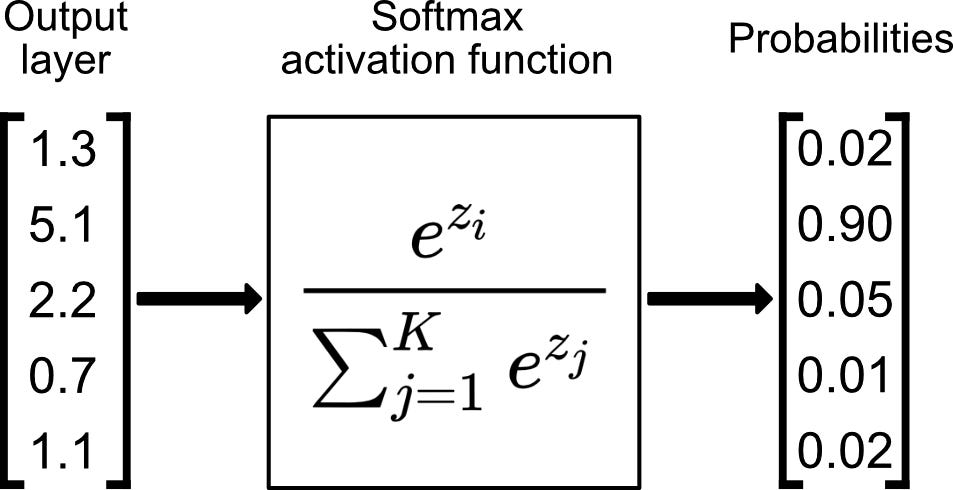

## Training

In [61]:
model_parameters1_1 = gradient_descent(X_train, y_train,[784,100,15], 0.005, 10000)

Iteration: 1000 / 10000
10.705%
Loss: 2.8693181220958603
Iteration: 2000 / 10000
12.076%
Loss: 2.6843697809369127
Iteration: 3000 / 10000
13.152%
Loss: 2.622066831941561
Iteration: 4000 / 10000
13.933%
Loss: 2.590623423626032
Iteration: 5000 / 10000
14.581%
Loss: 2.570450440466549
Iteration: 6000 / 10000
14.914%
Loss: 2.555207622645728
Iteration: 7000 / 10000
15.238%
Loss: 2.54220435692234
Iteration: 8000 / 10000
15.752%
Loss: 2.5307271181033175
Iteration: 9000 / 10000
16.181%
Loss: 2.520505503460138
Iteration: 10000 / 10000
16.581%
Loss: 2.511065130751259


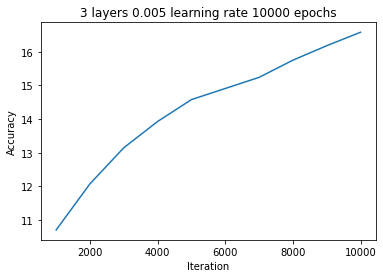

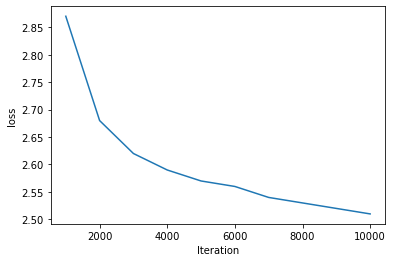

In [80]:
import matplotlib.pyplot as plt 
  
y = [10.71,12.08,13.15,13.93,14.58,14.91,15.24,15.75,16.18,16.58] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('3 layers 0.005 learning rate 10000 epochs')
plt.show() 

y = [2.87,2.68,2.62,2.59,2.57,2.56,2.54,2.53,2.52,2.51] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show() 

In [134]:
model = make_predictions(X_test,model_parameters1_1)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters1_1)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.1471111111111111
Validation accuracy: 0.1408888888888889



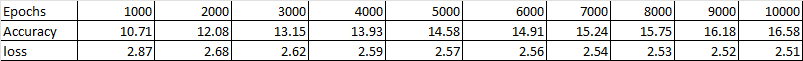

In [70]:
model_parameters2_1 = gradient_descent(X_train, y_train,[784,200,100,15], 0.005, 10000)

Iteration: 1000 / 10000
11.790%
Loss: 2.7739950249118412
Iteration: 2000 / 10000
14.667%
Loss: 2.5912079492875137
Iteration: 3000 / 10000
16.181%
Loss: 2.544328824691342
Iteration: 4000 / 10000
16.962%
Loss: 2.517333535331683
Iteration: 5000 / 10000
17.771%
Loss: 2.496080046993036
Iteration: 6000 / 10000
18.238%
Loss: 2.4791100560188664
Iteration: 7000 / 10000
18.829%
Loss: 2.463954192462482
Iteration: 8000 / 10000
19.419%
Loss: 2.4506775343434897
Iteration: 9000 / 10000
19.724%
Loss: 2.438821238363556
Iteration: 10000 / 10000
20.010%
Loss: 2.4278718689872427


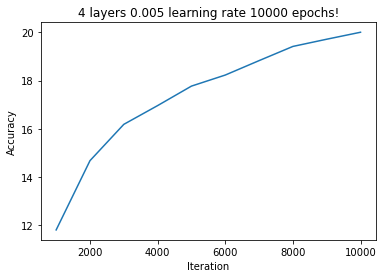

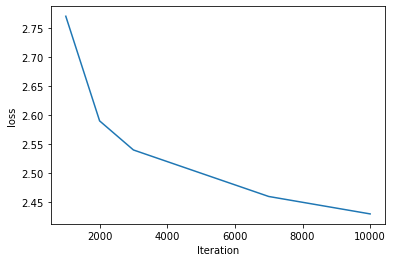

In [82]:
import matplotlib.pyplot as plt 
  
y = [11.79,14.67,16.18,16.96,17.77,18.23,18.83,19.42,19.72,20.01] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('4 layers 0.005 learning rate 10000 epochs!')
plt.show() 

y = [2.77,2.59,2.54,2.52,2.50,2.48,2.46,2.45,2.44,2.43] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show() 

In [135]:
model = make_predictions(X_test,model_parameters2_1)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters2_1)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.15333333333333332
Validation accuracy: 0.156


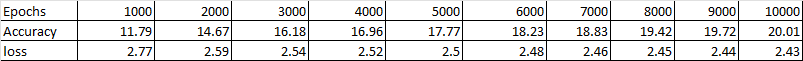

In [71]:
model_parameters3_1 = gradient_descent(X_train, y_train,[784,100,80,50,15], 0.005, 10000)

Iteration: 1000 / 10000
13.343%
Loss: 2.6391500247295245
Iteration: 2000 / 10000
14.981%
Loss: 2.5686542259209197
Iteration: 3000 / 10000
16.124%
Loss: 2.5358170916991596
Iteration: 4000 / 10000
16.981%
Loss: 2.5135633457844344
Iteration: 5000 / 10000
17.533%
Loss: 2.4957673969704826
Iteration: 6000 / 10000
18.086%
Loss: 2.4805012675342337
Iteration: 7000 / 10000
18.810%
Loss: 2.467151268061447
Iteration: 8000 / 10000
19.057%
Loss: 2.4553170478699085
Iteration: 9000 / 10000
19.324%
Loss: 2.444419355097145
Iteration: 10000 / 10000
19.667%
Loss: 2.434148534053154


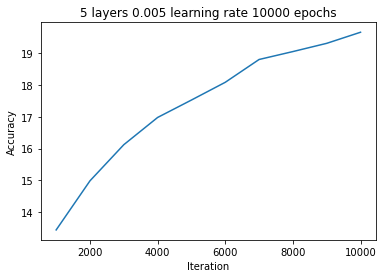

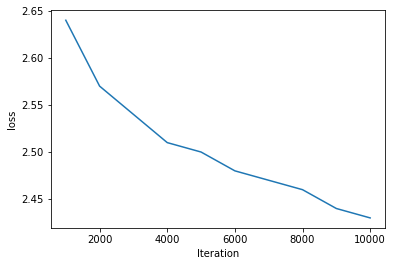

In [81]:
import matplotlib.pyplot as plt 
  
y = [13.43,14.98,16.12,16.98,17.53,18.09,18.81,19.06,19.32,19.67] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('5 layers 0.005 learning rate 10000 epochs')
plt.show() 

y = [2.64,2.57,2.54,2.51,2.50,2.48,2.47,2.46,2.44,2.43] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show() 

In [136]:
model = make_predictions(X_test,model_parameters3_1)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters3_1)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.15155555555555555
Validation accuracy: 0.15288888888888888


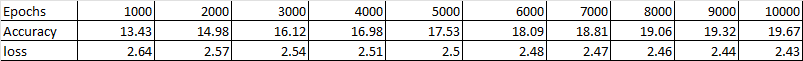

In [72]:
model_parameters1_2 = gradient_descent(X_train, y_train,[784,100,15], 0.01, 10000)

Iteration: 1000 / 10000
12.752%
Loss: 2.721075379627219
Iteration: 2000 / 10000
15.124%
Loss: 2.587737164591345
Iteration: 3000 / 10000
16.219%
Loss: 2.543279447152301
Iteration: 4000 / 10000
16.876%
Loss: 2.5179149036715005
Iteration: 5000 / 10000
17.629%
Loss: 2.4985163607521867
Iteration: 6000 / 10000
18.333%
Loss: 2.4827531001422485
Iteration: 7000 / 10000
18.705%
Loss: 2.4690001207542114
Iteration: 8000 / 10000
19.219%
Loss: 2.456575014221873
Iteration: 9000 / 10000
19.619%
Loss: 2.4453600269959437
Iteration: 10000 / 10000
19.943%
Loss: 2.4350647153724303


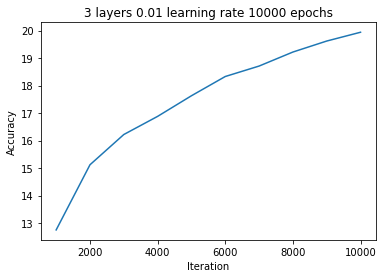

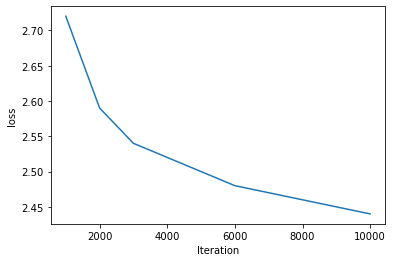

In [83]:
import matplotlib.pyplot as plt 
  
y = [12.75,15.12,16.22,16.88,17.63,18.33,18.71,19.22,19.62,19.94] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('3 layers 0.01 learning rate 10000 epochs')
plt.show() 

y = [2.72,2.59,2.54,2.52,2.50,2.48,2.47,2.46,2.45,2.44] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show() 

In [137]:
model = make_predictions(X_test,model_parameters1_2)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters1_2)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.16044444444444445
Validation accuracy: 0.1497777777777778


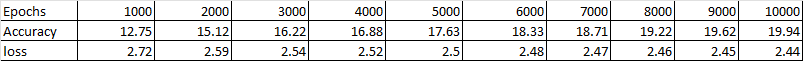

In [73]:
model_parameters2_2 = gradient_descent(X_train, y_train,[784,200,100,15], 0.01, 10000)

Iteration: 1000 / 10000
14.695%
Loss: 2.59550767349691
Iteration: 2000 / 10000
15.952%
Loss: 2.5410886168277664
Iteration: 3000 / 10000
16.781%
Loss: 2.510479892459031
Iteration: 4000 / 10000
17.619%
Loss: 2.4875986369073377
Iteration: 5000 / 10000
18.476%
Loss: 2.4681270023007547
Iteration: 6000 / 10000
18.695%
Loss: 2.451232328617563
Iteration: 7000 / 10000
19.133%
Loss: 2.43585507405262
Iteration: 8000 / 10000
19.600%
Loss: 2.4216922488189665
Iteration: 9000 / 10000
20.019%
Loss: 2.4084099617062464
Iteration: 10000 / 10000
20.571%
Loss: 2.395530813571855


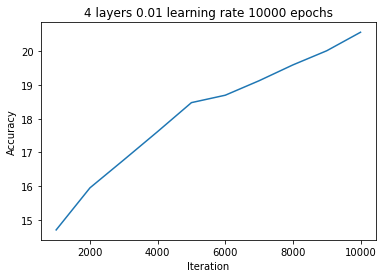

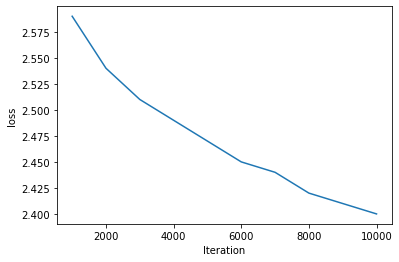

In [84]:
import matplotlib.pyplot as plt 
  
y = [14.70,15.95,16.78,17.62,18.48,18.70,19.13,19.60,20.02,20.57] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('4 layers 0.01 learning rate 10000 epochs')
plt.show() 

y = [2.59,2.54,2.51,2.49,2.47,2.45,2.44,2.42,2.41,2.40] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show() 

In [138]:
model = make_predictions(X_test,model_parameters2_2)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters2_2)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.16577777777777777
Validation accuracy: 0.14266666666666666


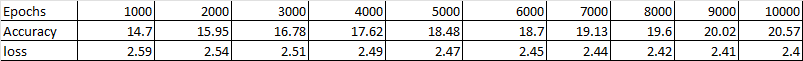

In [74]:
model_parameters3_2 = gradient_descent(X_train, y_train,[784,100,80,50,15], 0.01, 10000)

Iteration: 1000 / 10000
12.181%
Loss: 2.6451003521137006
Iteration: 2000 / 10000
13.505%
Loss: 2.590562244175822
Iteration: 3000 / 10000
14.057%
Loss: 2.562663061418678
Iteration: 4000 / 10000
14.600%
Loss: 2.5426670351124216
Iteration: 5000 / 10000
14.857%
Loss: 2.5245563544434213
Iteration: 6000 / 10000
15.486%
Loss: 2.5056510610483986
Iteration: 7000 / 10000
15.943%
Loss: 2.489745745697728
Iteration: 8000 / 10000
16.114%
Loss: 2.4766688992123793
Iteration: 9000 / 10000
16.581%
Loss: 2.4643580223639767
Iteration: 10000 / 10000
16.943%
Loss: 2.4528862577827533


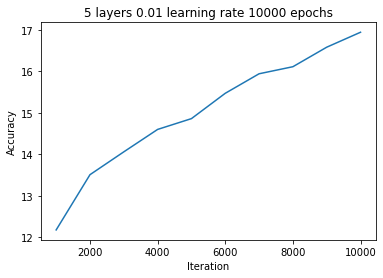

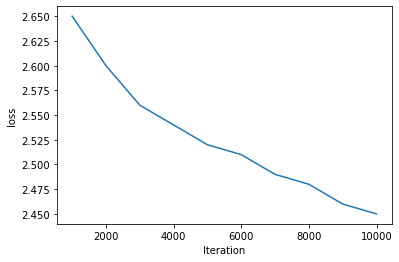

In [85]:
import matplotlib.pyplot as plt 
  
y = [12.18,13.51,14.06,14.60,14.86,15.47,15.94,16.11,16.58,16.94] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('5 layers 0.01 learning rate 10000 epochs')
plt.show() 

y = [2.65,2.60,2.56,2.54,2.52,2.51,2.49,2.48,2.46,2.45] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show()  

In [139]:
model = make_predictions(X_test,model_parameters3_2)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters3_2)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.1431111111111111
Validation accuracy: 0.11466666666666667


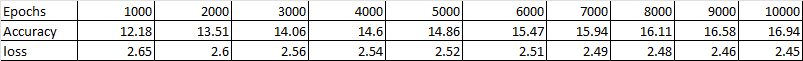

In [75]:
model_parameters1_3 = gradient_descent(X_train, y_train,[784,100,15], 0.02, 10000)

Iteration: 1000 / 10000
15.152%
Loss: 2.58355403118758
Iteration: 2000 / 10000
16.800%
Loss: 2.514534703574793
Iteration: 3000 / 10000
18.400%
Loss: 2.4769863356375796
Iteration: 4000 / 10000
19.371%
Loss: 2.446467680441949
Iteration: 5000 / 10000
20.219%
Loss: 2.4196835005253337
Iteration: 6000 / 10000
21.114%
Loss: 2.396334421208995
Iteration: 7000 / 10000
21.857%
Loss: 2.3758368909659606
Iteration: 8000 / 10000
22.648%
Loss: 2.357083580709967
Iteration: 9000 / 10000
23.210%
Loss: 2.33975922367023
Iteration: 10000 / 10000
23.790%
Loss: 2.323364704164045


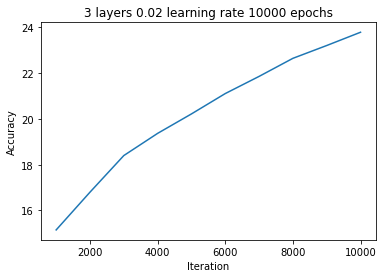

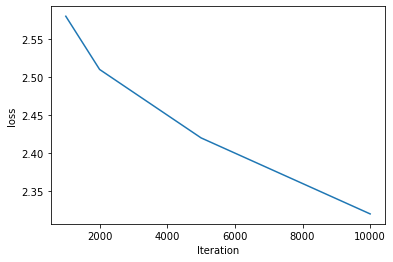

In [106]:
import matplotlib.pyplot as plt 
  
y = [15.15,16.80,18.40,19.37,20.22,21.11,21.86,22.65,23.21,23.79] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('3 layers 0.02 learning rate 10000 epochs')
plt.show() 

y = [2.58,2.51,2.48,2.45,2.42,2.40,2.38,2.36,2.34,2.32] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show()  

In [140]:
model = make_predictions(X_test,model_parameters1_3)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters1_3)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.18133333333333335
Validation accuracy: 0.15511111111111112


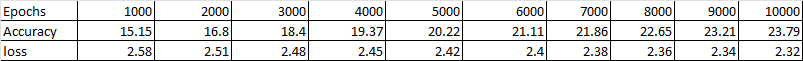

In [76]:
model_parameters2_3 = gradient_descent(X_train, y_train,[784,200,100,15], 0.02, 10000)

Iteration: 1000 / 10000
12.514%
Loss: 2.614323167658882
Iteration: 2000 / 10000
13.448%
Loss: 2.5716078397718185
Iteration: 3000 / 10000
14.533%
Loss: 2.5315269600177794
Iteration: 4000 / 10000
15.267%
Loss: 2.5067018014068956
Iteration: 5000 / 10000
16.143%
Loss: 2.4867616765688223
Iteration: 6000 / 10000
16.714%
Loss: 2.4685165161735974
Iteration: 7000 / 10000
17.429%
Loss: 2.450345550100173
Iteration: 8000 / 10000
17.943%
Loss: 2.4323561428811247
Iteration: 9000 / 10000
18.467%
Loss: 2.414823114768961
Iteration: 10000 / 10000
18.971%
Loss: 2.3975045069126537


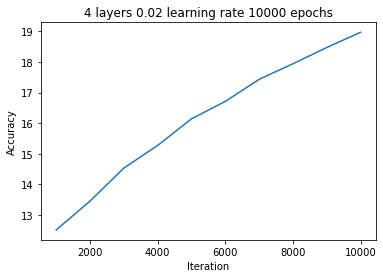

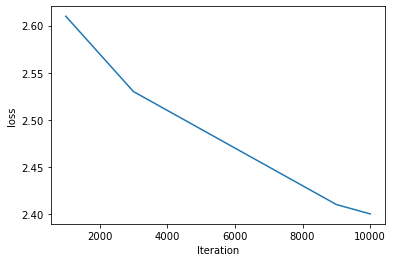

In [86]:
import matplotlib.pyplot as plt 
  
y = [12.51,13.45,14.53,15.27,16.14,16.71,17.43,17.94,18.47,18.97] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('4 layers 0.02 learning rate 10000 epochs')
plt.show() 

y = [2.61,2.57,2.53,2.51,2.49,2.47,2.45,2.43,2.41,2.40] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show()  

In [141]:
model = make_predictions(X_test,model_parameters2_3)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters2_3)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.12666666666666668
Validation accuracy: 0.1351111111111111


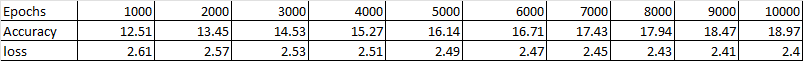

In [77]:
model_parameters3_3 = gradient_descent(X_train, y_train,[784,100,80,50,15], 0.02, 10000)

Iteration: 1000 / 10000
11.448%
Loss: 2.6178384217942052
Iteration: 2000 / 10000
12.895%
Loss: 2.5824016282629096
Iteration: 3000 / 10000
13.533%
Loss: 2.5599284262152757
Iteration: 4000 / 10000
14.114%
Loss: 2.539561703159088
Iteration: 5000 / 10000
14.848%
Loss: 2.519281490699113
Iteration: 6000 / 10000
15.562%
Loss: 2.5003533470589887
Iteration: 7000 / 10000
16.429%
Loss: 2.4823684740294154
Iteration: 8000 / 10000
16.924%
Loss: 2.4643693386731065
Iteration: 9000 / 10000
17.371%
Loss: 2.4470323138513725
Iteration: 10000 / 10000
17.810%
Loss: 2.4298200520443096


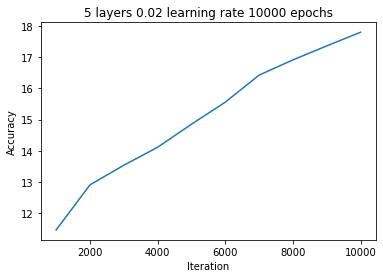

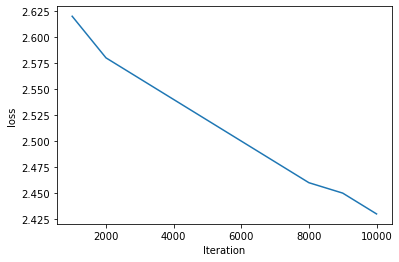

In [87]:
import matplotlib.pyplot as plt 
  
y = [11.45,12.90,13.53,14.11,14.85,15.56,16.43,16.92,17.37,17.81] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('Accuracy')
plt.xlabel('Iteration') 
plt.title('5 layers 0.02 learning rate 10000 epochs')
plt.show() 

y = [2.62,2.58,2.56,2.54,2.52,2.50,2.48,2.46,2.45,2.43] 
x = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] 
  
plt.plot(x, y) 
plt.ylabel('loss')
plt.xlabel('Iteration') 

plt.show()  

In [142]:
model = make_predictions(X_test,model_parameters3_3)
print(f"Test accuracy: {get_accuracy(model,y_test)}")
model = make_predictions(X_valid,model_parameters3_3)
print(f"Validation accuracy: {get_accuracy(model,y_valid)}")

Test accuracy: 0.14844444444444443
Validation accuracy: 0.13555555555555557


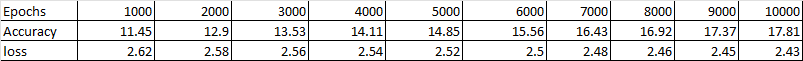

In this experiment, we achieved the best result in the 3-layer model. As the learning rate of the model increased, an increase in accuracy and a decrease in loss were observed. Having to neglect colors in the given data set seriously reduced our accuracy rate. In this model, we can give the layer sizes we want. Thus, the number of layers can change depending on user input.

part2

In [142]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time


NB = 15 
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True


In [143]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h
    

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

In [144]:
def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

# Printing features for the VGG-19 architecture

In [145]:
vgg19_layers = get_vgg_layers(vgg19_config, batch_norm=True)
print(vgg19_layers)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace=True)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

# We set the output number from the default value of 1000 to 15.

In [146]:
OUTPUT_DIM = 15

model = VGG(vgg19_layers, OUTPUT_DIM)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

# Importing the pretrained vgg-19 model from torchvision library

In [147]:
import torchvision.models as models

pretrained_model = models.vgg19_bn(pretrained=True)

print(pretrained_model)

C:\Users\musta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\musta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [148]:
pretrained_model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [149]:
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.classifier[-1] = final_fc
print(pretrained_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=15, bias=True)
)


In [150]:
model.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

In [151]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 139,642,703 trainable parameters


Here, we prepare the datasets after reading the data, shaping it and normalizing it. We can also take the size of the photos larger, but when we do this, it takes too much time to train and test the photos, so we create datasets using the smallest dimensions (32, 32) that the model offers us.

In [152]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader


train_data_dir = "flowers15/train"
validation_data_dir = "flowers15/val"
test_data_dir = "flowers15/test"

data_transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])

# Train, test ve validation veri setlerini yükleyin
train_data = ImageFolder(root=train_data_dir, transform=data_transform)
test_data = ImageFolder(root=test_data_dir, transform=data_transform)
valid_data = ImageFolder(root=validation_data_dir, transform=data_transform)


print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 10500
Number of validation examples: 2250
Number of testing examples: 2250



We show a few photos from the dataset here.

In [153]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min=image_min, max=image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image


def plot_images(images, labels, classes, normalize=True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(10, 10))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        ax.set_title(classes[labels[i]])
        ax.axis('off')

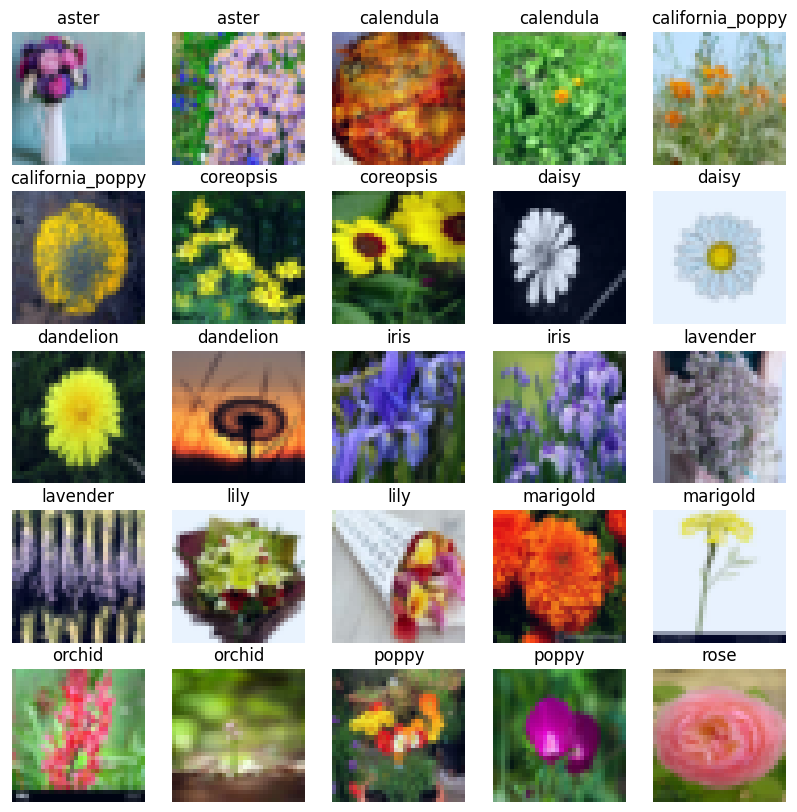

In [154]:
N_IMAGES = 25

images, labels = zip(*[(image, label) for image, label in
                       [train_data[i*350] for i in range(N_IMAGES)]])

classes = test_data.classes

plot_images(images, labels, classes)

In [155]:
BATCH_SIZE = 128

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

We define the device we will place our model on our GPU, if any. Then we define the criterion (loss function) and place the model and criterion in our device.
Here we set lr to 0.001, but we can find the optimized value by trying different values. But it is not possible to do this with the resources we have, we need powerful machines and time for this.

In [156]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

Here, instead of using a different learning rate for every single layer, we have split the parameters into two "groups": features, which contains all the convolutional layers; and classifier, which contains all the linear layers. classifier will be using the FOUND_LR given directly to the optimizer and features will be using FOUND_LR / 10, as specified in the first dictionary. Thus, our convolutional layers have a learning rate 10x less than the linear layers

In [157]:
FOUND_LR = 0.001
params = [
          {'params': model.features.parameters(), 'lr': FOUND_LR/10},
          {'params': model.classifier.parameters()}
         ]

optimizer = optim.Adam(params, lr=FOUND_LR)
#We create a function to calculate accuracy
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

function that performs an evaluation loop

In [158]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

helper function to tell us how long an epoch takes

In [159]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

 function that implements a training loop

In [160]:
def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

we'll get the predictions for each of the examples in the test set

In [161]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [162]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)

In [163]:
def plot_most_incorrect(incorrect, classes, n_images, normalize=True):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(25, 20))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image, true_label, probs = incorrect[i]
        image = image.permute(1, 2, 0)
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        true_class = classes[true_label]
        incorrect_class = classes[incorrect_label]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.cpu().numpy())
        ax.set_title(f'true label: {true_class} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_class} ({incorrect_prob:.3f})')
        ax.axis('off')

    fig.subplots_adjust(hspace=0.4)

In [164]:
def get_representations(model, iterator):

    model.eval()

    outputs = []
    labels = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            outputs.append(y_pred.cpu())
            labels.append(y)

    outputs = torch.cat(outputs, dim=0)
    labels = torch.cat(labels, dim=0)

    return outputs, labels



def get_pca(data, n_components=2):
    pca = decomposition.PCA()
    pca.n_components = n_components
    pca_data = pca.fit_transform(data)
    return pca_data

def plot_representations(data, labels, classes, n_images=None):

    if n_images is not None:
        data = data[:n_images]
        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')
    handles, labels = scatter.legend_elements()
    ax.legend(handles=handles, labels=classes)

1. You will finetune the weights of all layers in the VGG-19 network.

In [165]:
for name, param in model.named_parameters():
    if 'weight' in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

for name, param in model.named_parameters():
    print(f"Layer: {name}, Requires Grad: {param.requires_grad}")

Layer: features.0.weight, Requires Grad: True
Layer: features.0.bias, Requires Grad: False
Layer: features.1.weight, Requires Grad: True
Layer: features.1.bias, Requires Grad: False
Layer: features.3.weight, Requires Grad: True
Layer: features.3.bias, Requires Grad: False
Layer: features.4.weight, Requires Grad: True
Layer: features.4.bias, Requires Grad: False
Layer: features.7.weight, Requires Grad: True
Layer: features.7.bias, Requires Grad: False
Layer: features.8.weight, Requires Grad: True
Layer: features.8.bias, Requires Grad: False
Layer: features.10.weight, Requires Grad: True
Layer: features.10.bias, Requires Grad: False
Layer: features.11.weight, Requires Grad: True
Layer: features.11.bias, Requires Grad: False
Layer: features.14.weight, Requires Grad: True
Layer: features.14.bias, Requires Grad: False
Layer: features.15.weight, Requires Grad: True
Layer: features.15.bias, Requires Grad: False
Layer: features.17.weight, Requires Grad: True
Layer: features.17.bias, Requires G

In [166]:
EPOCHS = 5

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 6m 27s
	Train Loss: 1.964 | Train Acc: 37.96%
	 Val. Loss: 1.449 |  Val. Acc: 55.95%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 6m 17s
	Train Loss: 1.260 | Train Acc: 62.09%
	 Val. Loss: 1.448 |  Val. Acc: 59.35%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 5m 48s
	Train Loss: 0.918 | Train Acc: 72.38%
	 Val. Loss: 1.493 |  Val. Acc: 61.32%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 6m 4s
	Train Loss: 0.858 | Train Acc: 74.61%
	 Val. Loss: 1.534 |  Val. Acc: 62.08%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 6m 9s
	Train Loss: 0.700 | Train Acc: 81.40%
	 Val. Loss: 1.610 |  Val. Acc: 62.51%


In [167]:
model.load_state_dict(torch.load('tut4-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Test Loss: 1.282 | Test Acc: 62.52%


In [168]:
images, labels, probs = get_predictions(model, test_iterator)
pred_labels = torch.argmax(probs, 1)

  0%|          | 0/18 [00:00<?, ?it/s]

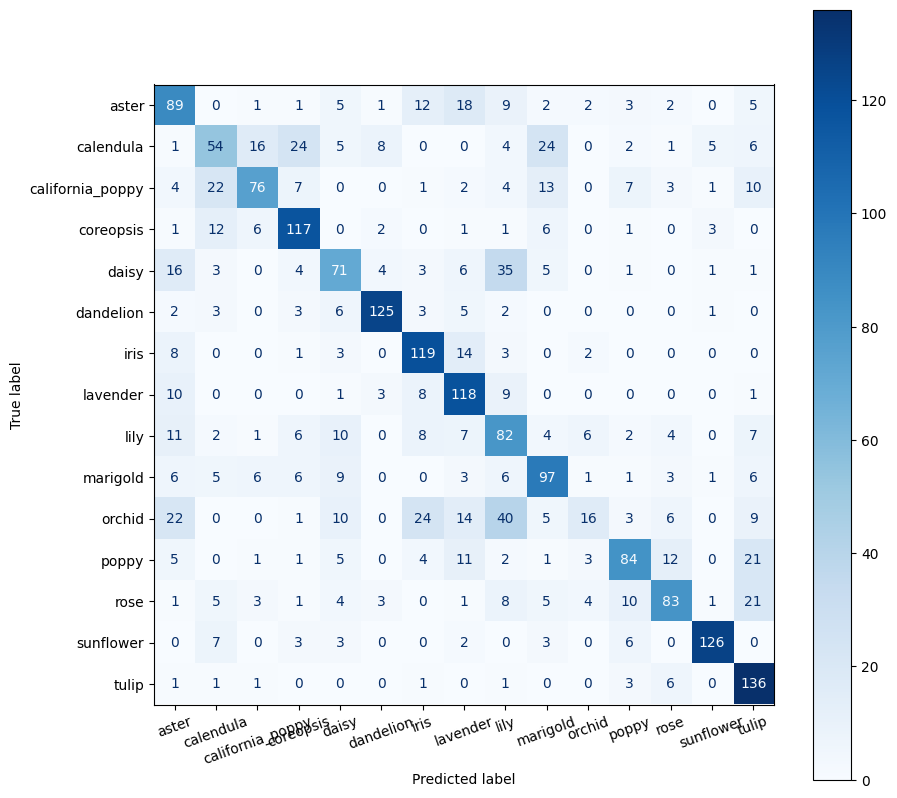

In [169]:

plot_confusion_matrix(labels, pred_labels, classes)

In [170]:
corrects = torch.eq(labels, pred_labels)
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse = True,
                        key=lambda x: torch.max(x[2], dim=0).values)

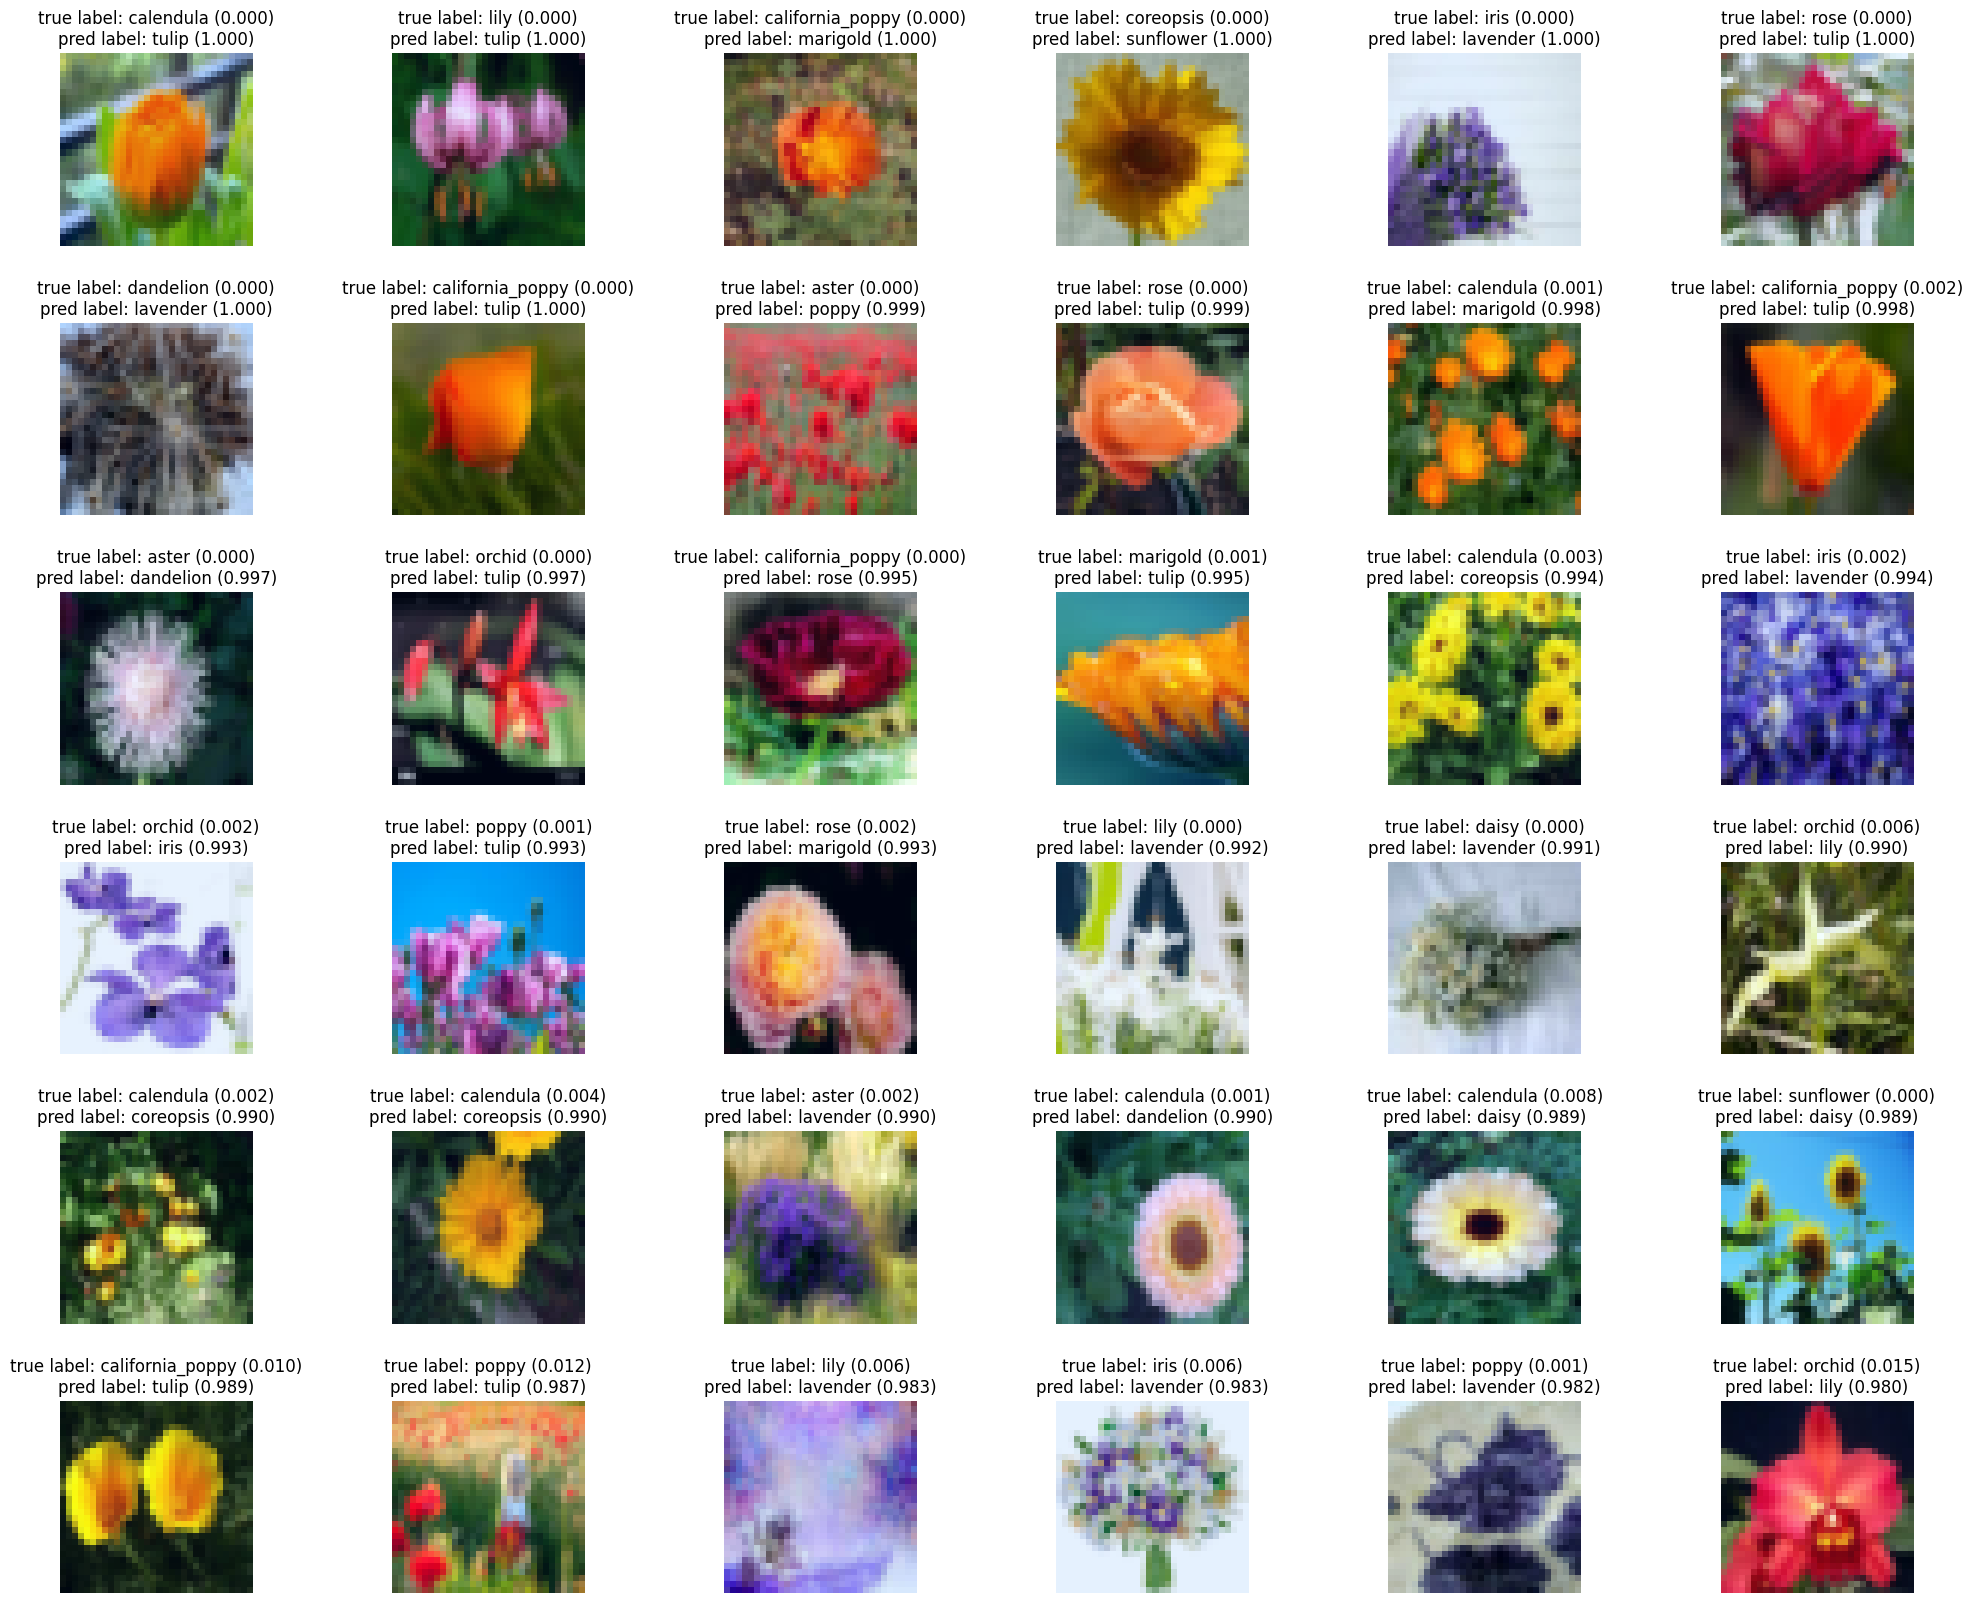

In [171]:
N_IMAGES = 36

plot_most_incorrect(incorrect_examples, classes, N_IMAGES)

  0%|          | 0/83 [00:00<?, ?it/s]

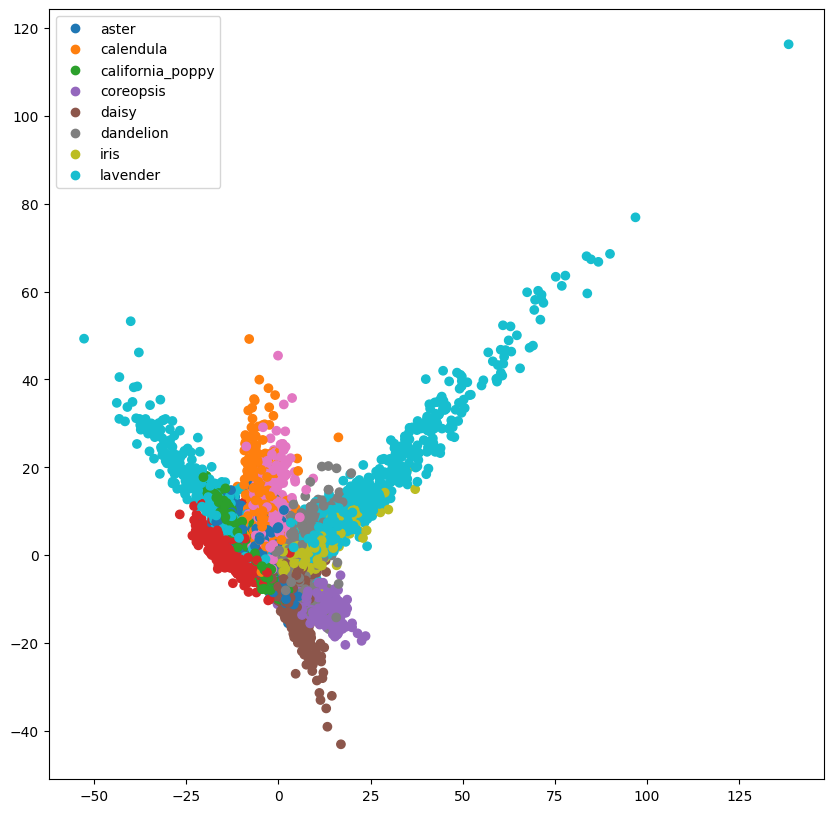

In [172]:
outputs, labels = get_representations(model, train_iterator)
output_pca_data = get_pca(outputs)
plot_representations(output_pca_data, labels, classes)

2. You will finetune the weights of only two last fully connected (FC1 and FC2) layers
in the VGG-19 network.

In [173]:
for name, param in model.named_parameters():
    if 'classifier.0' in name or 'classifier.3' in name:  # FC1 and FC2 
        param.requires_grad = True
    else:
        param.requires_grad = False


for name, param in model.named_parameters():
    print(f"Layer: {name}, Requires Grad: {param.requires_grad}")

Layer: features.0.weight, Requires Grad: False
Layer: features.0.bias, Requires Grad: False
Layer: features.1.weight, Requires Grad: False
Layer: features.1.bias, Requires Grad: False
Layer: features.3.weight, Requires Grad: False
Layer: features.3.bias, Requires Grad: False
Layer: features.4.weight, Requires Grad: False
Layer: features.4.bias, Requires Grad: False
Layer: features.7.weight, Requires Grad: False
Layer: features.7.bias, Requires Grad: False
Layer: features.8.weight, Requires Grad: False
Layer: features.8.bias, Requires Grad: False
Layer: features.10.weight, Requires Grad: False
Layer: features.10.bias, Requires Grad: False
Layer: features.11.weight, Requires Grad: False
Layer: features.11.bias, Requires Grad: False
Layer: features.14.weight, Requires Grad: False
Layer: features.14.bias, Requires Grad: False
Layer: features.15.weight, Requires Grad: False
Layer: features.15.bias, Requires Grad: False
Layer: features.17.weight, Requires Grad: False
Layer: features.17.bias,

In [174]:
EPOCHS = 5

best_valid_loss = float('inf')

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 3m 0s
	Train Loss: 0.903 | Train Acc: 74.11%
	 Val. Loss: 1.444 |  Val. Acc: 61.67%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 3m 1s
	Train Loss: 0.783 | Train Acc: 75.92%
	 Val. Loss: 1.494 |  Val. Acc: 62.31%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 3m 2s
	Train Loss: 0.746 | Train Acc: 76.87%
	 Val. Loss: 1.511 |  Val. Acc: 62.01%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 3m 2s
	Train Loss: 0.792 | Train Acc: 77.44%
	 Val. Loss: 1.625 |  Val. Acc: 61.71%


Training:   0%|          | 0/83 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 3m 3s
	Train Loss: 1.187 | Train Acc: 77.65%
	 Val. Loss: 1.526 |  Val. Acc: 61.35%


In [175]:
model.load_state_dict(torch.load('tut5-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/18 [00:00<?, ?it/s]

Test Loss: 1.332 | Test Acc: 64.43%


In [176]:
images, labels, probs = get_predictions(model, test_iterator)
pred_labels = torch.argmax(probs, 1)

  0%|          | 0/18 [00:00<?, ?it/s]

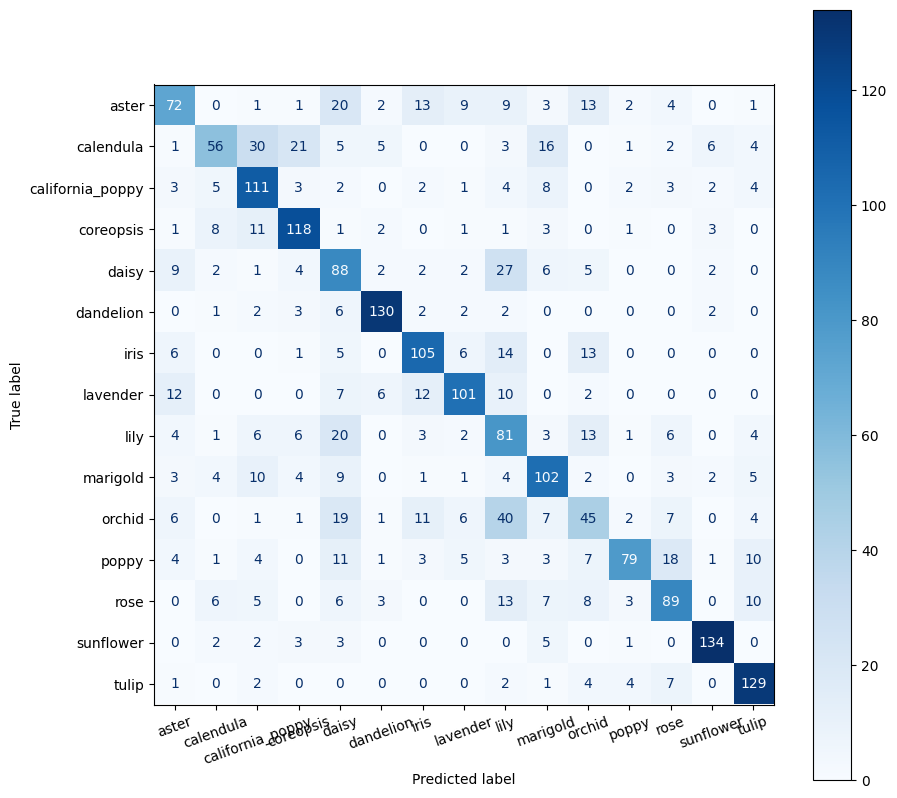

In [177]:
plot_confusion_matrix(labels, pred_labels, classes)

In [178]:
corrects = torch.eq(labels, pred_labels)
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse = True,
                        key=lambda x: torch.max(x[2], dim=0).values)

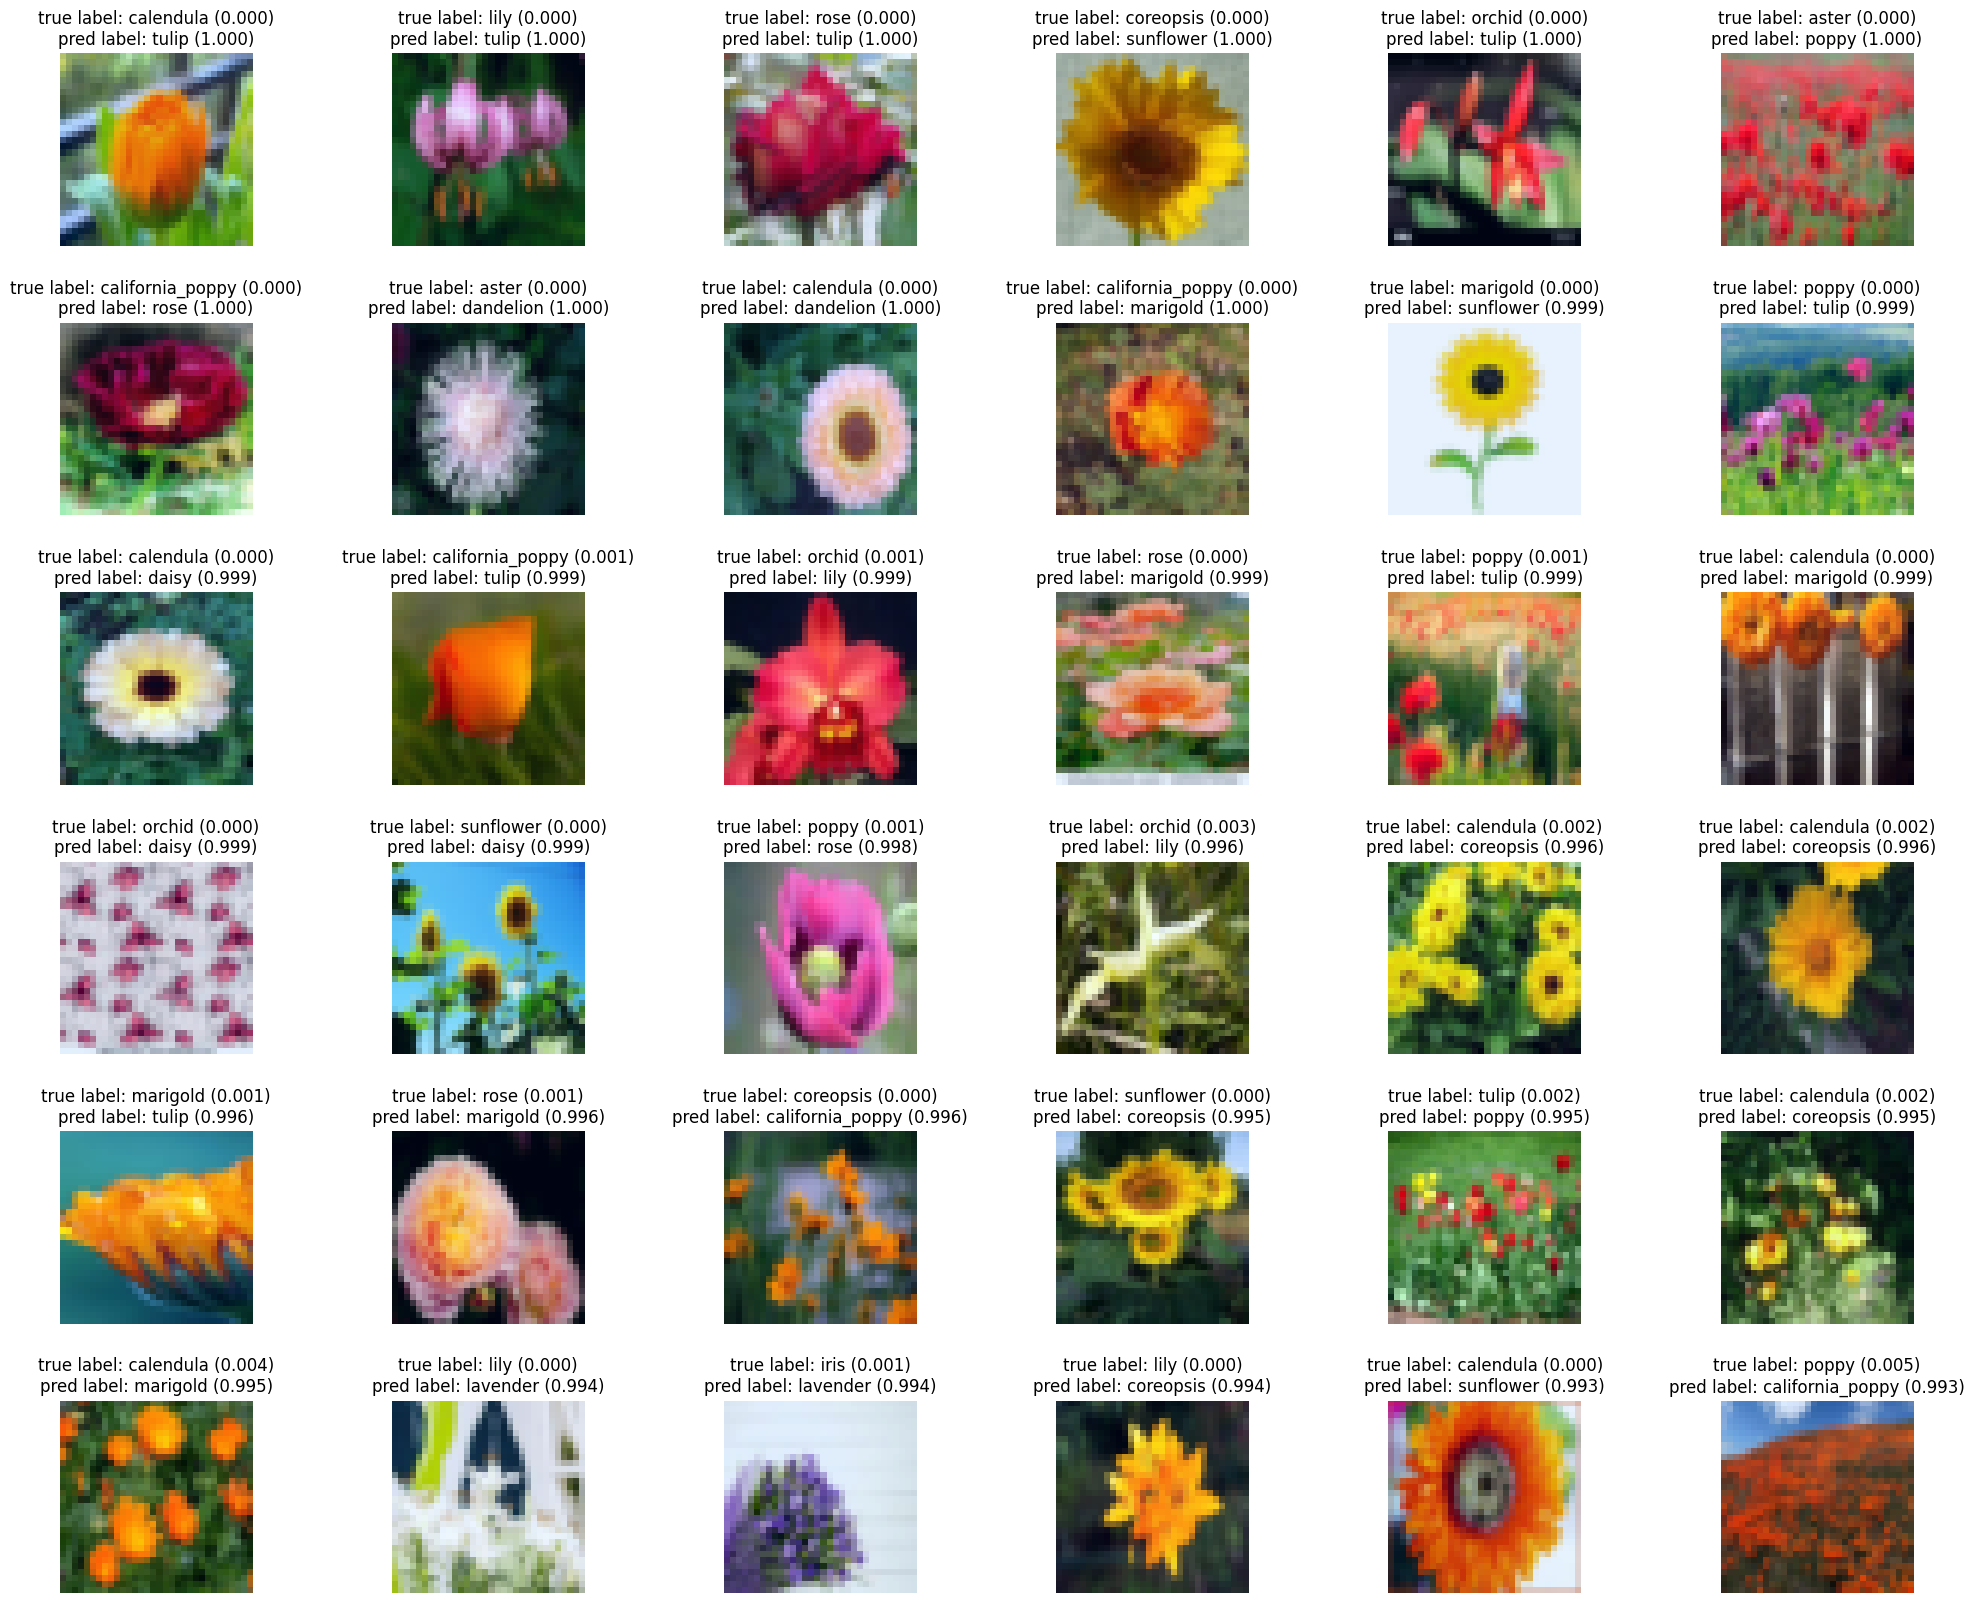

In [179]:
N_IMAGES = 36

plot_most_incorrect(incorrect_examples, classes, N_IMAGES)

  0%|          | 0/83 [00:00<?, ?it/s]

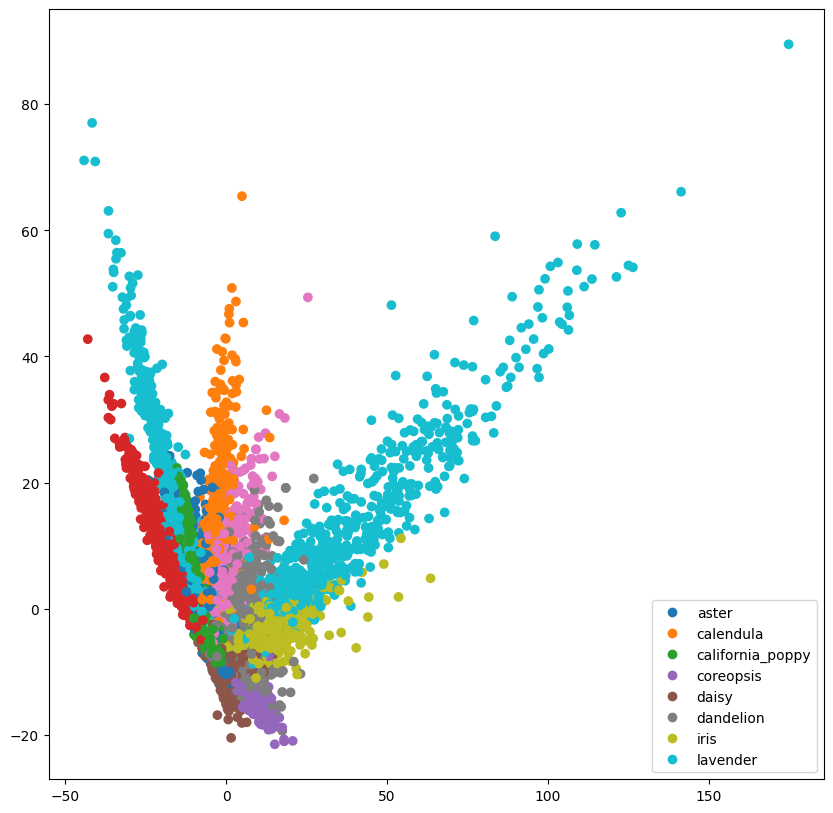

In [182]:
outputs1, labels1 = get_representations(model, train_iterator)
output_pca_data1 = get_pca(outputs1)
plot_representations(output_pca_data1, labels1, classes)